<a href="https://colab.research.google.com/github/Bkalene/exercicios-python/blob/main/series-temporais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA

# Simulando dados de vendas mensais de um ano
vendas_mensais = [
    1000, 1200, 1500, 1800, 2000, 2200,
    2500, 2800, 2400, 2000, 1800, 1500,
    1200, 1500, 1800, 2100, 2300, 2500,
    2800, 2600, 2200, 1800, 1600, 1300
]

# Criando um DataFrame com a data e as vendas
data = pd.to_datetime(['2023-01-01', '2023-02-01', '2023-03-01', '2023-04-01', '2023-05-01', '2023-06-01',
                       '2023-07-01', '2023-08-01', '2023-09-01', '2023-10-01', '2023-11-01', '2023-12-01',
                       '2024-01-01', '2024-02-01', '2024-03-01', '2024-04-01', '2024-05-01', '2024-06-01',
                       '2024-07-01', '2024-08-01', '2024-09-01', '2024-10-01', '2024-11-01', '2024-12-01'])
df_vendas = pd.DataFrame({'Data': data, 'Vendas': vendas_mensais})
df_vendas = df_vendas.set_index('Data')



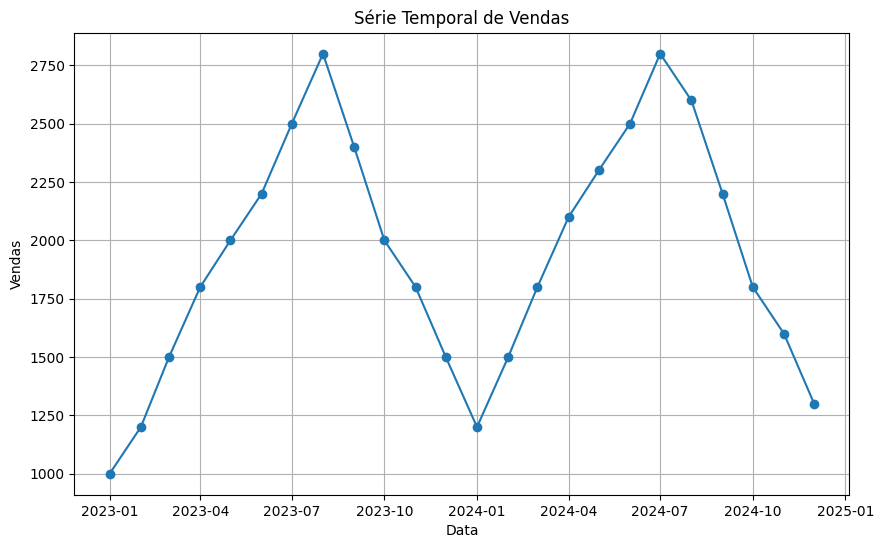

In [ ]:
# 1. Visualização da Série Temporal
plt.figure(figsize=(10, 6))
plt.plot(df_vendas.index, df_vendas['Vendas'], marker='o', linestyle='-')
plt.xlabel("Data")
plt.ylabel("Vendas")
plt.title("Série Temporal de Vendas")
plt.grid(True)
plt.show()



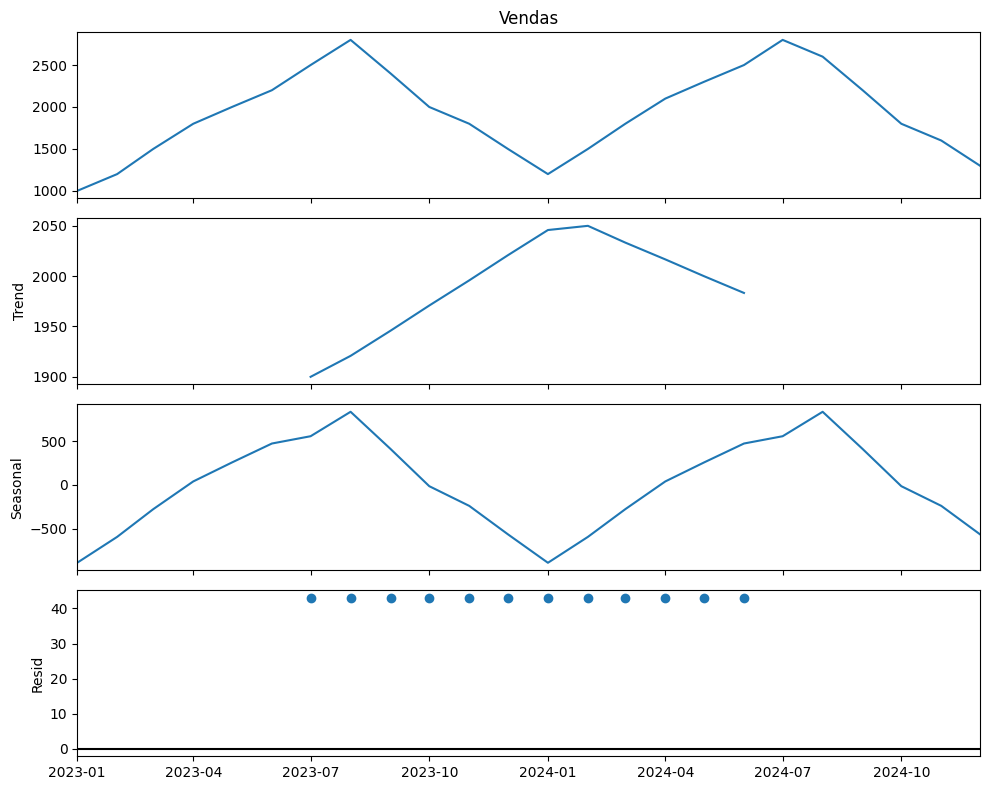

In [ ]:
# 2. Decomposição da Série Temporal
decomposicao = seasonal_decompose(df_vendas['Vendas'], model='additive', period=12)
plt.rcParams["figure.figsize"] = (10, 8)
decomposicao.plot()
plt.show()



In [ ]:
# 3. Modelagem ARIMA
# Ajustando o modelo ARIMA com parâmetros (5,1,0) - Experimente outros parâmetros!
modelo = ARIMA(df_vendas['Vendas'], order=(5, 1, 0))
modelo_fit = modelo.fit()
print(modelo_fit.summary())



/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                 Vendas   No. Observations:                   24
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -152.233
Date:                Mon, 03 Jun 2024   AIC                            316.466
Time:                        13:33:32   BIC                            323.279
Sample:                    01-01-2023   HQIC                           318.180
                         - 12-01-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6197      0.332      1.865      0.062      -0.031       1.271
ar.L2         -0.1987      0.488     -0.407      0.684      -1.155       0.758
ar.L3          0.1037      0.411      0.252      0.8

In [ ]:
# 4. Previsão para o próximo ano
previsoes = modelo_fit.predict(start=len(df_vendas), end=len(df_vendas) + 11)



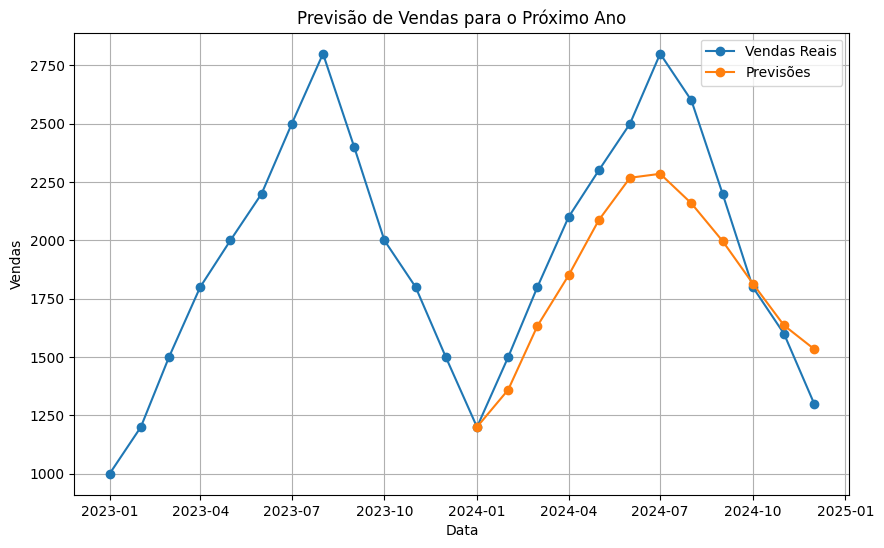

In [ ]:
# 5. Visualização da previsão
plt.figure(figsize=(10, 6))
plt.plot(df_vendas.index, df_vendas['Vendas'], marker='o', linestyle='-', label="Vendas Reais")
plt.plot(df_vendas.index[-12:], previsoes, marker='o', linestyle='-', label="Previsões")
plt.xlabel("Data")
plt.ylabel("Vendas")
plt.title("Previsão de Vendas para o Próximo Ano")
plt.legend()
plt.grid(True)
plt.show()



In [ ]:
# Imprimindo as previsões
print("Previsões de Vendas para o Próximo Ano:")
print(previsoes)

Previsões de Vendas para o Próximo Ano:
2025-01-01    1200.356210
2025-02-01    1359.929406
2025-03-01    1633.169761
2025-04-01    1850.077074
2025-05-01    2086.804704
2025-06-01    2268.356559
2025-07-01    2285.360889
2025-08-01    2158.835544
2025-09-01    1997.256367
2025-10-01    1815.165790
2025-11-01    1635.854812
2025-12-01    1534.098768
Freq: MS, Name: predicted_mean, dtype: float64
